<a href="https://colab.research.google.com/github/NileshCT/Machine_Learning_Models/blob/main/RandomForest_Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
#importing dataset
df=pd.read_csv("/content/drive/MyDrive/heart_v2.csv")

In [3]:
#Top 5 records
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
#Last five records
df.tail()

,age,sex,BP,cholestrol,heart disease
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0
269,67,1,160,286,1


In [6]:
df.shape

(270, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [37]:
#Exploring datatypes
df.dtypes

age              int64
sex              int64
BP               int64
cholestrol       int64
heart disease    int64
dtype: object

In [38]:
#Counting records from target variable.
df["heart disease"].value_counts().sum()

270

In [39]:
#Spliting data in X,y.
X=df.drop(["heart disease"],axis=1)
y=df["heart disease"]

In [40]:
#Exploring non null value counts.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         270 non-null    int64
 1   sex         270 non-null    int64
 2   BP          270 non-null    int64
 3   cholestrol  270 non-null    int64
dtypes: int64(4)
memory usage: 8.6 KB


In [14]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 270 entries, 0 to 269
Series name: heart disease
Non-Null Count  Dtype
--------------  -----
270 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [41]:
#Spliting data in trail test split.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [42]:
#Exploring shape of X_train
X_train.shape

(189, 4)

In [43]:
#Exploring shape of X_test
X_test.shape

(81, 4)

In [44]:
#Imporing the required library for model fiting.
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=50,n_jobs=-1,max_depth=5,n_estimators=200,oob_score=True)

rfc: This is the variable name that you are assigning the RandomForestClassifier object to.
RandomForestClassifier: This is a class in the sklearn.ensemble module that implements a random forest algorithm for classification.
random_state=42: This sets the seed for the random number generator, which ensures that the results are reproducible.
n_jobs=-1: This specifies the number of CPU cores to use for parallel processing. Setting it to -1 means to use all available cores.
max_depth=5: This sets the maximum depth of each decision tree in the forest.
n_estimators=100: This sets the number of trees in the forest.
oob_score=True: This specifies whether to use out-of-bag samples to estimate the generalization accuracy of the model.

In [45]:
#Fitting train data for trailing.
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=50)

In [46]:
#Pred.the x_train
rfc.predict(X_train)

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [47]:
#Pred. of the x_test
rfc.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [48]:
# checking the oob score
rfc.oob_score_

0.6613756613756614

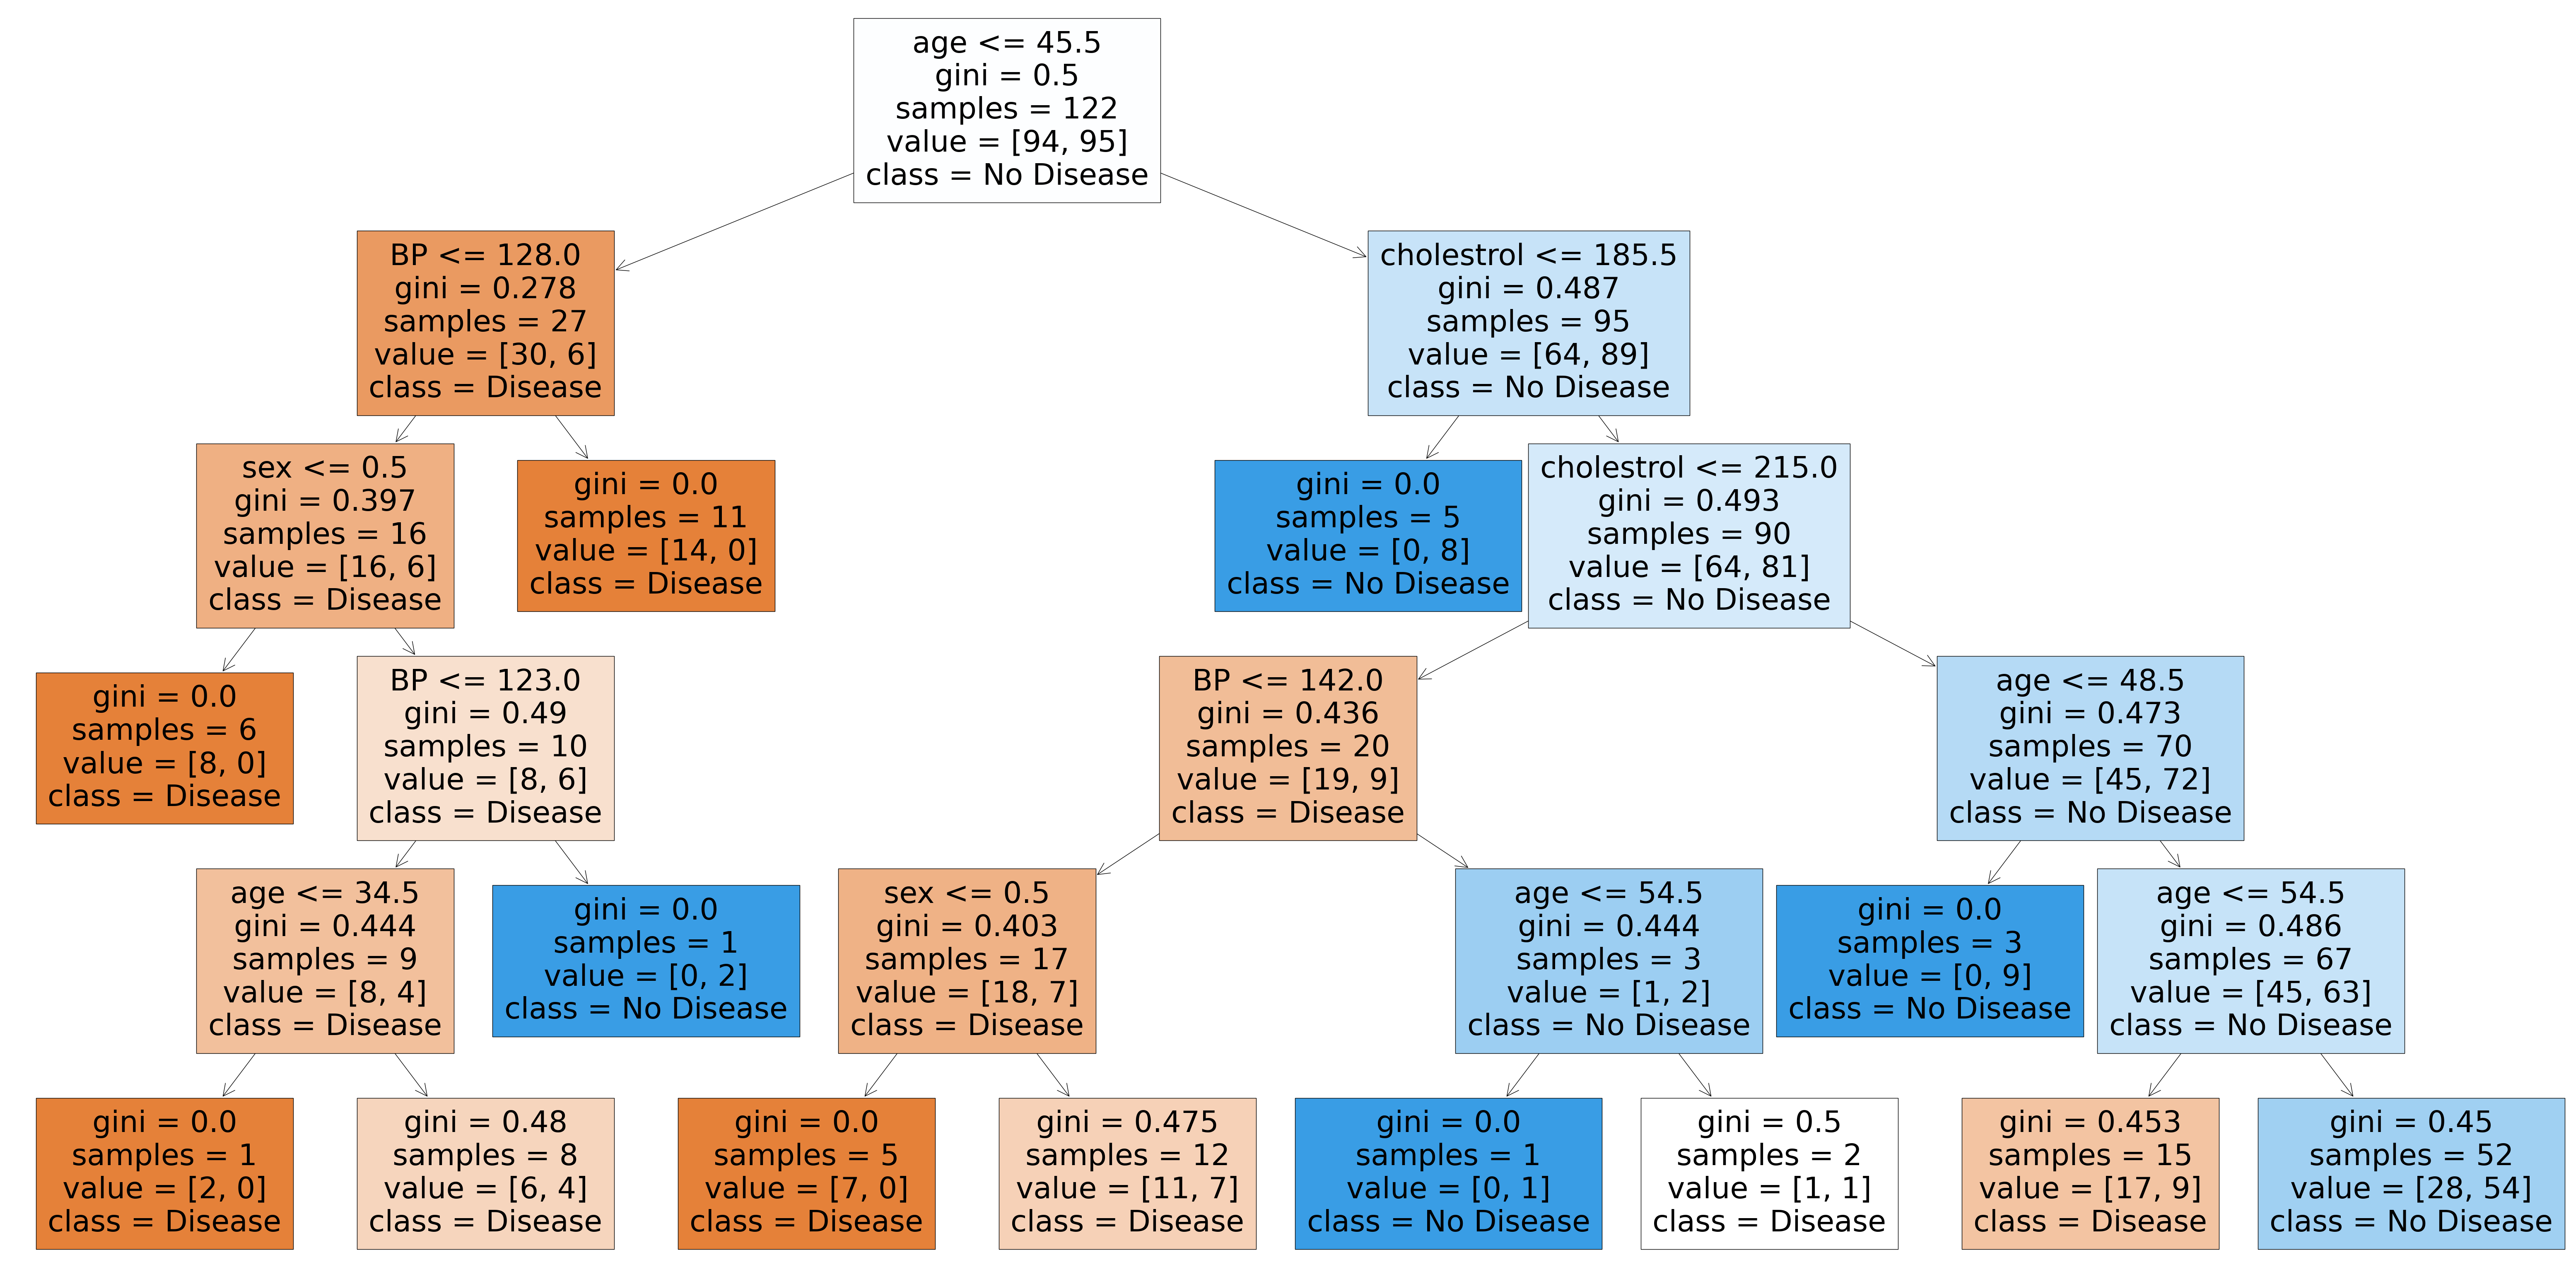

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rfc.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);